In [1]:
import torch
import numpy as np

In [4]:
torch.cuda.is_available()
device = torch.device('cuda')
device

device(type='cuda')

In [5]:
torch.zeros(3, 3, 3, 3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])

In [6]:
torch.rand(1, 3)

tensor([[0.7544, 0.7682, 0.6727]])

In [7]:
t = torch.rand(3, 5, 3)
t, torch.transpose(t, 2, 1)

(tensor([[[0.2662, 0.4256, 0.4592],
          [0.3416, 0.3950, 0.2324],
          [0.8806, 0.9216, 0.7627],
          [0.7451, 0.5215, 0.5231],
          [0.8720, 0.8128, 0.1447]],
 
         [[0.6062, 0.7066, 0.9658],
          [0.9789, 0.4777, 0.1646],
          [0.0304, 0.0348, 0.6393],
          [0.5738, 0.9400, 0.3064],
          [0.9341, 0.6881, 0.1466]],
 
         [[0.3040, 0.0764, 0.7105],
          [0.2172, 0.8099, 0.9170],
          [0.8368, 0.4498, 0.0738],
          [0.6515, 0.7407, 0.8365],
          [0.8439, 0.3692, 0.4515]]]),
 tensor([[[0.2662, 0.3416, 0.8806, 0.7451, 0.8720],
          [0.4256, 0.3950, 0.9216, 0.5215, 0.8128],
          [0.4592, 0.2324, 0.7627, 0.5231, 0.1447]],
 
         [[0.6062, 0.9789, 0.0304, 0.5738, 0.9341],
          [0.7066, 0.4777, 0.0348, 0.9400, 0.6881],
          [0.9658, 0.1646, 0.6393, 0.3064, 0.1466]],
 
         [[0.3040, 0.2172, 0.8368, 0.6515, 0.8439],
          [0.0764, 0.8099, 0.4498, 0.7407, 0.3692],
          [0.7105, 0.9170, 0.

In [8]:
t, torch.transpose(t, 1, 2)

(tensor([[[0.2662, 0.4256, 0.4592],
          [0.3416, 0.3950, 0.2324],
          [0.8806, 0.9216, 0.7627],
          [0.7451, 0.5215, 0.5231],
          [0.8720, 0.8128, 0.1447]],
 
         [[0.6062, 0.7066, 0.9658],
          [0.9789, 0.4777, 0.1646],
          [0.0304, 0.0348, 0.6393],
          [0.5738, 0.9400, 0.3064],
          [0.9341, 0.6881, 0.1466]],
 
         [[0.3040, 0.0764, 0.7105],
          [0.2172, 0.8099, 0.9170],
          [0.8368, 0.4498, 0.0738],
          [0.6515, 0.7407, 0.8365],
          [0.8439, 0.3692, 0.4515]]]),
 tensor([[[0.2662, 0.3416, 0.8806, 0.7451, 0.8720],
          [0.4256, 0.3950, 0.9216, 0.5215, 0.8128],
          [0.4592, 0.2324, 0.7627, 0.5231, 0.1447]],
 
         [[0.6062, 0.9789, 0.0304, 0.5738, 0.9341],
          [0.7066, 0.4777, 0.0348, 0.9400, 0.6881],
          [0.9658, 0.1646, 0.6393, 0.3064, 0.1466]],
 
         [[0.3040, 0.2172, 0.8368, 0.6515, 0.8439],
          [0.0764, 0.8099, 0.4498, 0.7407, 0.3692],
          [0.7105, 0.9170, 0.

In [9]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype='float32')

In [10]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [11]:
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [12]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [13]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 94.8229
Epoch 10 Loss 83.5500
Epoch 20 Loss 24.7538
Epoch 30 Loss 15.6998
Epoch 40 Loss 23.9138
Epoch 50 Loss 0.9721
Epoch 60 Loss 0.0313
Epoch 70 Loss 0.6721
Epoch 80 Loss 3.9561
Epoch 90 Loss 1.2100
Epoch 100 Loss 1.1340
Epoch 110 Loss 0.0116
Epoch 120 Loss 1.8565
Epoch 130 Loss 0.3808
Epoch 140 Loss 0.2168
Epoch 150 Loss 0.1169
Epoch 160 Loss 0.2918
Epoch 170 Loss 1.0862
Epoch 180 Loss 0.1393
Epoch 190 Loss 0.0667


In [14]:
print(f'Final Params: {weight.item():.4f}x + {bias.item():.4f}')

Final Params: 2.6342x + 4.8826


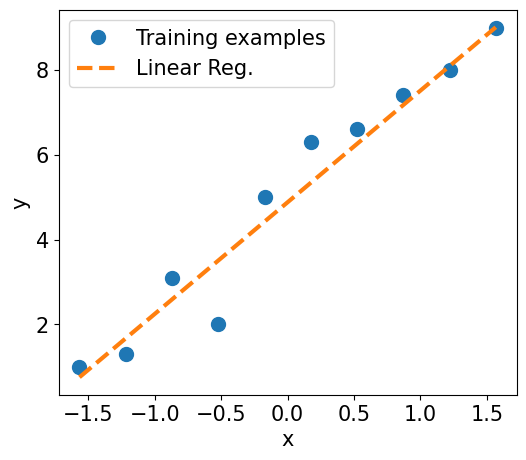

In [15]:
import matplotlib.pyplot as plt

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [16]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 2.2205
Epoch 10 Loss 0.2801
Epoch 20 Loss 0.0921
Epoch 30 Loss 2.3154
Epoch 40 Loss 0.0377
Epoch 50 Loss 0.8113
Epoch 60 Loss 0.0654
Epoch 70 Loss 2.3809
Epoch 80 Loss 0.7791
Epoch 90 Loss 0.1355
Epoch 100 Loss 0.0550
Epoch 110 Loss 0.1367
Epoch 120 Loss 0.7579
Epoch 130 Loss 0.0661
Epoch 140 Loss 0.2578
Epoch 150 Loss 0.0747
Epoch 160 Loss 0.0690
Epoch 170 Loss 0.7470
Epoch 180 Loss 0.2548
Epoch 190 Loss 0.2389


In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)


In [20]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [21]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return X

In [22]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [23]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# num_epochs = 100
# loss_hist = [0] * num_epochs
# accuracy_hist = [0] * num_epochs
# for epoch in range(num_epochs):
#     for x_batch, y_batch in train_dl:
#         pred = model(x_batch)
#         loss = loss_fn(pred, y_batch.long())
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         loss_hist[epoch] += loss.item()*y_batch.size(0)
#         is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
#         accuracy_hist[epoch] += is_correct.mean()
#     loss_hist[epoch] /= len(train_dl.dataset)
#     accuracy_hist[epoch] /= len(train_dl.dataset)

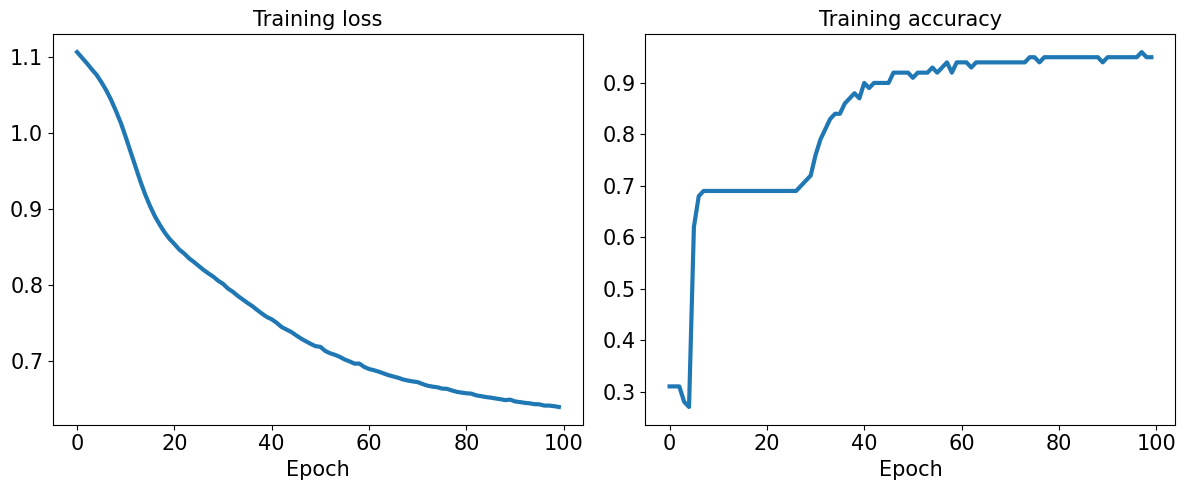

In [24]:

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train) 

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x
    
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

In [25]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


In [28]:
import pycuber as pc
from pycuber.solver import CFOPSolver

c = pc.Cube()
alg = pc.Formula()
random_alg = alg.random()

print(random_alg)
c(random_alg)

print(c)
solver = CFOPSolver(c)

solution = solver.solve(suppress_progress_messages=True)
print(solution)

print(c)

R' F2 D' R2 B D' R' F2 L2 B' R' D2 F R' U' F D2 L2 U R' D' F' U B' R'
         [g][w][y]
         [o][y][r]
         [o][y][r]
[o][w][w][b][r][w][g][b][g][o][r][w]
[b][r][y][b][g][o][b][o][g][r][b][w]
[o][g][w][b][g][r][y][o][r][b][y][b]
         [r][y][g]
         [w][w][g]
         [y][o][y]

B2 U2 R' F R2 D B U B' U F' U2 F U' F' U' F B U2 B' U2 B U B' U' L U2 L' B' U2 B U B' U2 B L' U' L F U2 F' L' U' L B' R' F R' F' R F R' F' R2 B R B' R' F R B R' F' R B R' F R B' R' F'
         [b][b][b]
         [b][b][b]
         [b][b][b]
[r][r][r][y][y][y][o][o][o][w][w][w]
[r][r][r][y][y][y][o][o][o][w][w][w]
[r][r][r][y][y][y][o][o][o][w][w][w]
         [g][g][g]
         [g][g][g]
         [g][g][g]



In [29]:
print(c)

         [b][b][b]
         [b][b][b]
         [b][b][b]
[r][r][r][y][y][y][o][o][o][w][w][w]
[r][r][r][y][y][y][o][o][o][w][w][w]
[r][r][r][y][y][y][o][o][o][w][w][w]
         [g][g][g]
         [g][g][g]
         [g][g][g]



In [30]:
print([str(x) for x in np.array(c.get_face('F')).flatten()])

['[y]', '[y]', '[y]', '[y]', '[y]', '[y]', '[y]', '[y]', '[y]']


In [31]:
pc.Square('green')

In [32]:
pc.Cubie(U=pc.Square('yellow'))

Cubie(U=Square('yellow'))

In [ ]:
# # from src.train import *
# # from src.data import *


# load_sequences('./data/train_0.dat', num_sequences=1)

RNN testing

In [33]:
from torchtext.datasets import IMDB

train_dataset = IMDB(split='train')
test_dataset = IMDB(split='test')


In [34]:
from torch.utils.data import random_split

torch.manual_seed(42)

train_dataset, valid_dataset = random_split(
    list(train_dataset), [20000, 5000]
)

In [35]:
import re
from collections import Counter, OrderedDict


token_counts = Counter()

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +        ' '.join(emoticons).replace('-', '')
    tokenized = text.split()
    return tokenized


for label, line in train_dataset:
    tokens = tokenizer(line)
    token_counts.update(tokens)
 
    
print('Vocab-size:', len(token_counts))


Vocab-size: 69209


In [36]:
from torchtext.vocab import vocab

sorted_by_freq_tuples = sorted(
    token_counts.items(), key=lambda x: x[1], reverse=True
)

In [37]:
ordered_dict = OrderedDict(sorted_by_freq_tuples)

vocab = vocab(ordered_dict)

vocab.insert_token('<pad>', 0)
vocab.insert_token('<unk>', 1)
vocab.set_default_index(1)

In [38]:
print([vocab[token] for token in ['this', 'is', 'a', 'sentence']])

[11, 7, 4, 4453]


In [39]:
text_pipline = lambda x: [vocab[token] for token in tokenizer(x)]
label_pipeline = lambda x: 1. if x == 2 else 0.

In [40]:
def collate_batch(batch):
    label_list, text_list, len_list = [], [], []
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        len_list.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(len_list)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True
    )
    return padded_text_list.to(device), label_list.to(device), lengths.to(device)

In [41]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch
)

In [42]:
batch_size = 32

train_dl = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch
)

valid_dl = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch
)

test_dl = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch
)

In [43]:
embedding = nn.Embedding(
    num_embeddings=10,
    embedding_dim=3,
    padding_idx=0
)

text_encoded_input = torch.LongTensor([[1, 2, 4, 5], [4, 3, 2, 0]])

embedding(text_encoded_input)

tensor([[[-0.7269, -0.8673, -1.0324],
         [ 1.4106,  1.0425, -0.9140],
         [-0.3351,  1.5477,  0.3904],
         [-1.0513,  1.0709,  1.8281]],

        [[-0.3351,  1.5477,  0.3904],
         [ 1.1367, -0.9850, -0.0713],
         [ 1.4106,  1.0425, -0.9140],
         [ 0.0000,  0.0000,  0.0000]]], grad_fn=<EmbeddingBackward0>)

In [44]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=2, batch_first=True)
        # self.rnn = nn.GRU(input_size, hidden_size, num_layers=2, batch_first=True)
        # self.rnn = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        _, hidden = self.rnn(x)
        out = hidden[-1, :, :]
        out = self.fc(out)
        return out


model = RNN(64, 32)
model

RNN(
  (rnn): RNN(64, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [45]:
model(torch.randn(5, 3, 64))

tensor([[-0.4234],
        [-0.2282],
        [ 0.0191],
        [-0.0981],
        [-0.2579]], grad_fn=<AddmmBackward0>)

In [48]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(
            out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True
        )
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [49]:
vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model.to(device)
model

RNN(
  (embedding): Embedding(69211, 20, padding_idx=0)
  (rnn): LSTM(20, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [50]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += (
            (pred >= 0.5).float() == label_batch
        ).float().sum().item()
        total_loss += loss.item() * label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [51]:
def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += (
                (pred >= 0.5).float() == label_batch
            ).float().sum().item()
            total_loss += loss.item() * label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [52]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [54]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 
                                      embed_dim, 
                                      padding_idx=0) 
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, 
                           batch_first=True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)
        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        out, (hidden, cell) = self.rnn(out)
        out = hidden[-1, :, :]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
         
vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size) 
model = model.to(device)

def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)
 
def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10 

torch.manual_seed(1)
 
for epoch in range(num_epochs):
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(valid_dl)
    print(f'Epoch {epoch} accuracy: {acc_train:.4f} val_accuracy: {acc_valid:.4f}')

Epoch 0 accuracy: 0.6127 val_accuracy: 0.5790
Epoch 1 accuracy: 0.7107 val_accuracy: 0.7628
Epoch 2 accuracy: 0.7544 val_accuracy: 0.7702
Epoch 3 accuracy: 0.8267 val_accuracy: 0.7702
Epoch 4 accuracy: 0.8679 val_accuracy: 0.8360
Epoch 5 accuracy: 0.8790 val_accuracy: 0.8456
Epoch 6 accuracy: 0.9150 val_accuracy: 0.8504
Epoch 7 accuracy: 0.9323 val_accuracy: 0.8632
Epoch 8 accuracy: 0.9433 val_accuracy: 0.8650
Epoch 9 accuracy: 0.9518 val_accuracy: 0.8568


In [55]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [56]:
embeddings = nn.Embedding(27, 8)
embeddings(torch.Tensor(np.arange(27)).to(torch.int64))

tensor([[ 1.1043e+00,  2.8337e-01,  4.0992e-01,  1.0463e+00,  3.8046e-01,
         -3.6512e-01, -7.0509e-02, -1.5148e+00],
        [-6.7212e-01,  5.7079e-01, -9.3948e-01, -2.2135e+00,  1.8021e-01,
         -6.7027e-01, -4.9000e-01,  9.5105e-01],
        [-1.8558e+00,  3.9005e-01,  8.5839e-01,  6.3271e-01, -5.3382e-02,
          1.1806e-01,  1.3405e+00, -9.2249e-01],
        [-4.1984e-01,  1.0553e+00, -6.3664e-01,  1.6225e+00,  2.9110e-01,
          6.2976e-02,  1.7065e-02, -8.7682e-01],
        [-2.5958e-01, -1.7663e+00,  8.8077e-01, -1.4067e+00,  2.3293e+00,
          1.7243e-01,  1.5408e+00, -1.5856e+00],
        [ 8.0107e-01,  4.0051e-01,  2.7087e+00, -4.3913e-01,  3.2906e-01,
          5.4770e-01,  7.1314e-01,  6.6375e-01],
        [ 1.1859e+00,  4.4372e-01, -8.1697e-01, -2.2163e-01,  3.2017e-01,
          1.2325e+00,  4.5436e-01, -5.9678e-01],
        [ 4.4148e-01, -9.6937e-02, -3.0496e-01, -1.7810e+00, -1.1760e+00,
         -5.0248e-01,  6.6957e-01, -7.1728e-01],
        [ 3.2523

In [ ]:
import pycuber as pc
from pycuber import *

def convert_string_state_to_cube(string_state) -> Cube:
    '''
    Convert the string state to a Pycube object.
    ULFRBD ordered. 6 x 9 x 6 state encoding.
    '''
    cubie_set = set([eval(cubie_string) for cubie_string in string_state.split(';')])
    return pc.Cube(cubie_set)


def convert_cube_to_state(cube):
    '''
    Convert a cube object to the NN state representation.
    ULFRBD ordered. 6 x 9 x 6 state encoding.
    '''
    color_vectors = {
        'b': np.array([1, 0, 0, 0, 0, 0]),
        'g': np.array([0, 1, 0, 0, 0, 0]),
        'o': np.array([0, 0, 1, 0, 0, 0]),
        'r': np.array([0, 0, 0, 1, 0, 0]),
        'w': np.array([0, 0, 0, 0, 1, 0]),
        'y': np.array([0, 0, 0, 0, 0, 1]),
    }
    state = np.zeros(shape=(6, 9, 6))
    for i, face in enumerate('ULFRBD'):
        unpacked_face = [str(x)[1] for x in np.array(cube.get_face(face)).flatten()]
        for j, square in enumerate(unpacked_face):
            state[i, j] = color_vectors[square]
    return state.flatten()


def load_sequences(filename, num_sequences=1000):
    '''Load a train.dat file and transform it into a series of cube states to move sequences.
    '''
    move_mapping = {
        'U': 0, 'U\'': 1, 'U2': 2,
        'L': 3, 'L\'': 4, 'L2': 5,
        'F': 6, 'F\'': 1, 'F2': 8,
        'R': 9, 'R\'': 1, 'R2': 11,
        'B': 12, 'B\'': 1, 'B2': 14,
        'D': 15, 'D\'': 1, 'D2': 17, '$': 18
    }
    with open(filename, 'r') as f:
        print(f'OPENING FILE: {filename}')
        log_i = 100
        sequences = []
        for i, line in enumerate(f):
            if i == num_sequences:
                return sequences
            if i % log_i == 0:
                print(f'LINE: {i}')
            string_state, solution = line.strip().split('|')
            unsolved_cube = convert_string_state_to_cube(string_state)
            sequence = []
            for step in solution.split():
                sequence.append((convert_cube_to_state(unsolved_cube), move_mapping[step]))
                unsolved_cube.perform_step(step)
            sequence.append((convert_cube_to_state(unsolved_cube), '$'))
            sequences.append(sequence)
        return sequences

In [ ]:
class CubeRNN(nn.Module):
    def __init__(self, num_pieces, embedding_dim, hidden_size, output_size, num_layers=1):
        super(CubeRNN, self).__init__()
        self.embedding = nn.Embedding(num_pieces, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=-1)
    
    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(1, x.size(0), hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        out = self.softmax(out)
        return out

flattened_cube_state = torch.arange(27)

hidden_size = 128
output_size = 12 

model = CubeRNN(27, 8, hidden_size, output_size)

input_tensor = torch.Tensor(np.arange(27)).to(torch.int64)

input_tensor = input_tensor.unsqueeze(0)

output = model(input_tensor)
print("Model Output:", output)

#### we want to pull one line -- turn it into a sequence of cube states to moves -- then train on it -- then pull the next line and repeat.

In [57]:
cube = pc.Cube()

alg = pc.Formula()
random_alg = alg.random()
cube(random_alg)

index = 0
for c in cube:
    # piece_to_index_mapping[c[1]] = index
    # location_to_array_position_mapping
    print(c)
    # index += 1

('BDL', Corner(L=Square('red'), D=Square('yellow'), B=Square('green')))
('FDL', Corner(F=Square('red'), L=Square('yellow'), D=Square('blue')))
('ULF', Corner(U=Square('red'), F=Square('white'), L=Square('blue')))
('ULB', Corner(L=Square('orange'), U=Square('yellow'), B=Square('green')))
('RUF', Corner(R=Square('orange'), F=Square('white'), U=Square('green')))
('RUB', Corner(U=Square('orange'), R=Square('white'), B=Square('blue')))
('RDB', Corner(D=Square('red'), B=Square('white'), R=Square('green')))
('RDF', Corner(D=Square('orange'), F=Square('yellow'), R=Square('blue')))
('LU', Edge(U=Square('red'), L=Square('green')))
('FU', Edge(U=Square('orange'), F=Square('yellow')))
('RU', Edge(R=Square('orange'), U=Square('blue')))
('BU', Edge(U=Square('white'), B=Square('green')))
('LF', Edge(F=Square('orange'), L=Square('white')))
('LB', Edge(L=Square('red'), B=Square('blue')))
('RF', Edge(F=Square('red'), R=Square('white')))
('RB', Edge(R=Square('white'), B=Square('blue')))
('FD', Edge(D=Squ

do we even need centers?

In [58]:
def encode_cube(cube, piece_to_index_mapping, location_to_array_position_mapping):
    cube_array = [None for _ in range(26)]
    for i, cubie_tuple in enumerate(cube):
        location, cubie = cubie_tuple
        squares = []
        for square in cubie:
            squares.append(str(square[1]))
        squares = tuple(squares)
        cube_array[location_to_array_position_mapping[location]] = piece_to_index_mapping[squares]
    return torch.Tensor([c for c in cube_array]).to(torch.int64)

def encode_move(move):
    move_mapping = {
        'U': 0, 'U\'': 1,
        'L': 2, 'L\'': 3,
        'F': 4, 'F\'': 5,
        'R': 6, 'R\'': 7,
        'B': 8, 'B\'': 9,
        'D': 10, 'D\'': 11,
        '$': 12
    }
    return move_mapping[move]

def get_sequences(filename, num_sequences=1000):
    log_sequences = 0
    sequences = []
    with open(filename, 'r') as f:
        for line in f:
            if len(sequences) == num_sequences:
                return sequences
            if len(sequences) % log_sequences == 0:
                print(f'Sequence {log_sequences} of {num_sequences}...')
            cubies_string, solution_string = line.split('|')
            solution_string.translate(str.maketrans({'U2': 'U U', 'L2': 'L L', 'R2': 'R R', 'F2': 'F F', 'D2': 'D D', 'B2': 'B B'}))
            cubies_set = set([eval(cubie_string) for cubie_string in cubies_string])
            cube = pc.Cube(cubies_set)
            moves = solution_string.split()
            cube_states = []
            move_states = []
            for move in moves:
                cube_states.append(encode_cube(cube))
                move_states.append(encode_move(move))
                cube.perform_step(move)
            cube_states.append(encode_cube(cube))
            move_states.append(encode_move('$'))
            sequences.append(cube_states, move_states)
    return sequences

In [59]:
piece_to_index_mapping = {}
location_to_array_position_mapping = {}

cube = pc.Cube()
index = 0
for c in cube:
    piece_to_index_mapping[tuple([str(square[1]) for square in c[1]])] = index
    location_to_array_position_mapping[c[0]] = index
    index += 1


In [60]:
location_to_array_position_mapping

{'BDL': 0,
 'FDL': 1,
 'ULF': 2,
 'ULB': 3,
 'RUF': 4,
 'RUB': 5,
 'RDB': 6,
 'RDF': 7,
 'LU': 8,
 'FU': 9,
 'RU': 10,
 'BU': 11,
 'LF': 12,
 'LB': 13,
 'RF': 14,
 'RB': 15,
 'FD': 16,
 'LD': 17,
 'BD': 18,
 'RD': 19,
 'F': 20,
 'U': 21,
 'R': 22,
 'L': 23,
 'D': 24,
 'B': 25}

In [61]:
piece_to_index_mapping

{('[r]', '[w]', '[b]'): 0,
 ('[r]', '[w]', '[g]'): 1,
 ('[r]', '[y]', '[g]'): 2,
 ('[r]', '[y]', '[b]'): 3,
 ('[o]', '[y]', '[g]'): 4,
 ('[o]', '[y]', '[b]'): 5,
 ('[o]', '[w]', '[b]'): 6,
 ('[o]', '[w]', '[g]'): 7,
 ('[r]', '[y]'): 8,
 ('[y]', '[g]'): 9,
 ('[o]', '[y]'): 10,
 ('[y]', '[b]'): 11,
 ('[r]', '[g]'): 12,
 ('[r]', '[b]'): 13,
 ('[o]', '[g]'): 14,
 ('[o]', '[b]'): 15,
 ('[w]', '[g]'): 16,
 ('[r]', '[w]'): 17,
 ('[w]', '[b]'): 18,
 ('[o]', '[w]'): 19,
 ('[g]',): 20,
 ('[y]',): 21,
 ('[o]',): 22,
 ('[r]',): 23,
 ('[w]',): 24,
 ('[b]',): 25}

In [62]:
from pycuber.solver import CFOPSolver

for i in range(5):
    print(f'CUBE {i}:')
    cube = pc.Cube()
    alg = pc.Formula()
    random_alg = alg.random()
    cube(random_alg)
    original_cube = cube.copy()
    print(f'SCRAMBLED:\n{encode_cube(cube, piece_to_index_mapping, location_to_array_position_mapping)}')
    print(cube)
    print()
    solver = CFOPSolver(cube)
    solution = solver.solve(cube)
    print(solution)
    original_cube.perform_algo(solution)
    print(f'SOLVED:\n{encode_cube(original_cube, piece_to_index_mapping, location_to_array_position_mapping)}')
    print(original_cube)
    print()
    print()

CUBE 0:
SCRAMBLED:
tensor([ 3,  7,  6,  0,  5,  4,  1,  2, 16, 15,  8, 10, 19, 14, 12,  9, 18, 17,
        13, 11, 20, 21, 22, 23, 24, 25])
         [r][y][o]
         [w][y][r]
         [b][b][o]
[w][g][o][w][o][b][y][y][y][g][o][b]
[o][r][o][w][g][r][g][o][g][y][b][g]
[y][r][o][w][w][r][y][b][w][r][b][b]
         [g][b][g]
         [w][w][y]
         [r][r][g]


F2 U' R F2 B' R2 U L U L' U F' U' F U F U F' U R' U' R U L' U2 L B' U' B U' F U F' U L' U' L B L' B' U' B U L U' B' U2 L U L' B' L U2 L' U2 L' B L U L U2 L' U'
SOLVED:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])
         [y][y][y]
         [y][y][y]
         [y][y][y]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
[r][r][r][g][g][g][o][o][o][b][b][b]
         [w][w][w]
         [w][w][w]
         [w][w][w]



CUBE 1:
SCRAMBLED:
tensor([ 3,  5,  6,  7,  0,  2,  4,  1, 19, 14, 11, 18,  9, 12, 10,  8, 16, 13,
        17, 15, 2

In [63]:
sequences = get_sequences('data/train_0.dat', num_sequences=100)

num_pieces = 27
embedding_dim = 16 
hidden_size = 128
output_size = 13
num_layers = 1

model = CubeRNN(num_pieces, embedding_dim, hidden_size, output_size, num_layers)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

ZeroDivisionError: integer modulo by zero

In [ ]:
output[0].sum()

In [83]:
import random
import pycuber as pc
from pycuber import *

def encode_cube(cube):
    piece_to_index_mapping = {}
    location_to_array_position_mapping = {}
    mapping_cube = pc.Cube()
    index = 0
    for c in mapping_cube:
        piece_to_index_mapping[tuple([str(square[1]) for square in c[1]])] = index
        location_to_array_position_mapping[c[0]] = index
        index += 1
    cube_array = [None for _ in range(26)]
    for i, cubie_tuple in enumerate(cube):
        location, cubie = cubie_tuple
        squares = []
        for square in cubie:
            squares.append(str(square[1]))
        squares = tuple(squares)
        cube_array[location_to_array_position_mapping[location]] = piece_to_index_mapping[squares]
    print(cube_array)
    return torch.Tensor([c for c in cube_array]).to(torch.int64)


def encode_move(move):
    move_mapping = {
        'U': 0, 'U\'': 1,
        'L': 2, 'L\'': 3,
        'F': 4, 'F\'': 5,
        'R': 6, 'R\'': 7,
        'B': 8, 'B\'': 9,
        'D': 10, 'D\'': 11,
        '$': 12
    }
    return move_mapping[move]


def random_line(filename, prev_lines):
    with open(filename, 'r') as file:
        rand_line = next(file)
        rand_num = 0
        for num, line in enumerate(file, 2):
            if random.randrange(num) or num in prev_lines:
                continue
            rand_line = line
            rand_num = num
        return rand_num, rand_line


def yield_sequences(filename, num_sequences=1000):
    i = 0
    prev_lines = []
    while i < num_sequences:
        line_num, line = random_line(filename, prev_lines)
        print(line)
        prev_lines.append(line_num)
        cubies_string, solution_string = line.split('|')
        mapping = {'U2': 'U U', 'L2': 'L L', 'R2': 'R R', 'F2': 'F F', 'D2': 'D D', 'B2': 'B B'}
        for k, v in mapping.items():
            solution_string = solution_string.replace(k, v)
        cubies_set = set([eval(cubie_string) for cubie_string in cubies_string.split(';')])
        cube = pc.Cube(cubies_set)
        print(cube)
        moves = solution_string.split()
        cube_states = []
        move_states = []
        for move in moves:
            cube_states.append(encode_cube(cube))
            move_states.append(encode_move(move))
            cube.perform_step(move)
        cube_states.append(encode_cube(cube))
        move_states.append(encode_move('$'))
        if i % 100 == 0:
            print(f'Sequnce {i} of {num_sequences}')
        i += 1
        sequence = cube_states, move_states
        print(sequence)
        yield sequence

In [85]:


for sequence in yield_sequences('data/train_0.dat', num_sequences=1):
    print(sequence)

Corner(D=Square('orange'), B=Square('white'), L=Square('green'));Corner(L=Square('red'), D=Square('white'), F=Square('green'));Corner(U=Square('orange'), F=Square('yellow'), L=Square('blue'));Corner(B=Square('red'), U=Square('white'), L=Square('blue'));Corner(F=Square('red'), U=Square('yellow'), R=Square('green'));Corner(U=Square('red'), R=Square('yellow'), B=Square('blue'));Corner(D=Square('orange'), B=Square('yellow'), R=Square('green'));Corner(F=Square('orange'), D=Square('white'), R=Square('blue'));Edge(L=Square('red'), U=Square('green'));Edge(U=Square('red'), F=Square('yellow'));Edge(U=Square('red'), R=Square('white'));Edge(B=Square('white'), U=Square('blue'));Edge(L=Square('red'), F=Square('blue'));Edge(L=Square('yellow'), B=Square('green'));Edge(R=Square('orange'), F=Square('green'));Edge(R=Square('yellow'), B=Square('blue'));Edge(F=Square('orange'), D=Square('yellow'));Edge(L=Square('orange'), D=Square('white'));Edge(D=Square('orange'), B=Square('blue'));Edge(D=Square('white'),